# Image Processing SoSe 2024 - Assignment - 06

### Deadline is 06.06.2024 at 12:00 p.m.

#### Students: Vinzent Hannes Jörß, Minh Tuan Nguyen

Please solve the assignments together with a partner.

Make sure the code runs without errors, when clicking `Kernel` -> `Restart Kernel & Run All Cells`. Then save the notebook and upload your submission.

In [53]:

# display the plots inside the notebook
%matplotlib inline

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
from scipy.io import wavfile
from io import BytesIO
#import urllib.request as urllib2
import certifi
import requests #instead of urllib2 because of SSL certificate error
import IPython.display as adt
pylab.rcParams['figure.figsize'] = (12, 12)   # This makes the plot bigger

# Exercise 1 - Cross Correlation - 3 Points
Implement a function `my_cross_correlation`, which takes two discrete functions in the form of arrays as an input and outputs the resulting crosscorrelation function. Now apply your correlation function as follows:
a) use as input function 1 an array of 10 random numbers (0-255), function 2 shall be `[1 2 3]`, plot the two functions and the result of the crosscorrelation of both.
b) use the same function 1 as in a), function 2 shall be `[2 2 2]`. Plot the two functions and the cross correlation of both.
c) repeat the first two tasks but swap the arguments

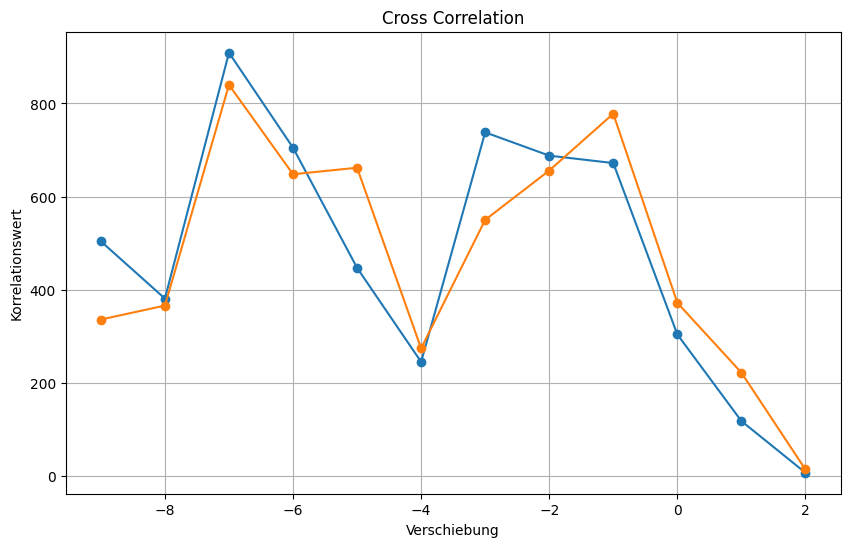

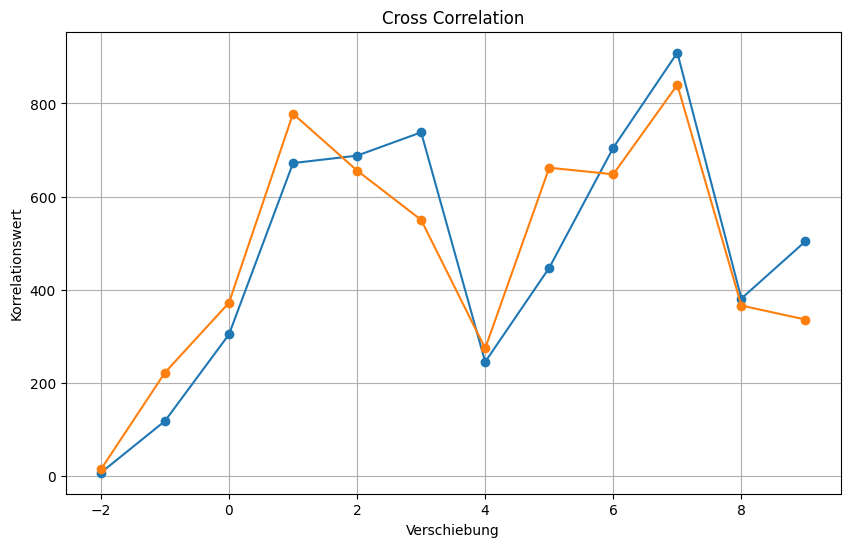

In [55]:
np.random.seed(2)
func_ref = np.random.randint(0, 256, size=10)
func1 = np.array([1,2,3])
func2 = np.array([2,2,2])

def my_cross_correlation(func1, func2):
    return np.correlate(func1, func2, mode="full")
    
def lags(func1, func2):
    return np.arange(-len(func1) + 1, len(func2))

plt.figure(figsize=(10,6))
plt.plot(lags(func_ref, func1), my_cross_correlation(func_ref, func1), label="Random Func (corr) [1,2,3]", marker="o")
plt.plot(lags(func_ref, func2), my_cross_correlation(func_ref, func2), label="Random Func (corr) [2,2,2]", marker="o")
plt.title("Cross Correlation")
plt.xlabel("Verschiebung")
plt.ylabel("Korrelationswert")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))

plt.plot(lags(func1, func_ref), my_cross_correlation(func1, func_ref), label="[1,2,3] (corr) Random Func", marker="o")
plt.plot(lags(func2, func_ref), my_cross_correlation(func2, func_ref), label="[2,2,2] Func (corr) Random Func", marker="o")
plt.title("Cross Correlation")
plt.xlabel("Verschiebung")
plt.ylabel("Korrelationswert")
plt.grid(True)
plt.show()

# Exercise 2 - DFT - 2 Point

Provide an orthogonal DFT matrix which can be used to transform one-dimensional signals of length 7. Calculate all elements (do not use variables) of the matrix.

look at ip_ueb06_exercise03.pdf

# Exercise 3 - Discrete Fourier Transformation - 2 Points
Implement the Discrete Fourier Transformation with [Matrix Multiplication](https://en.wikipedia.org/wiki/DFT_matrix).

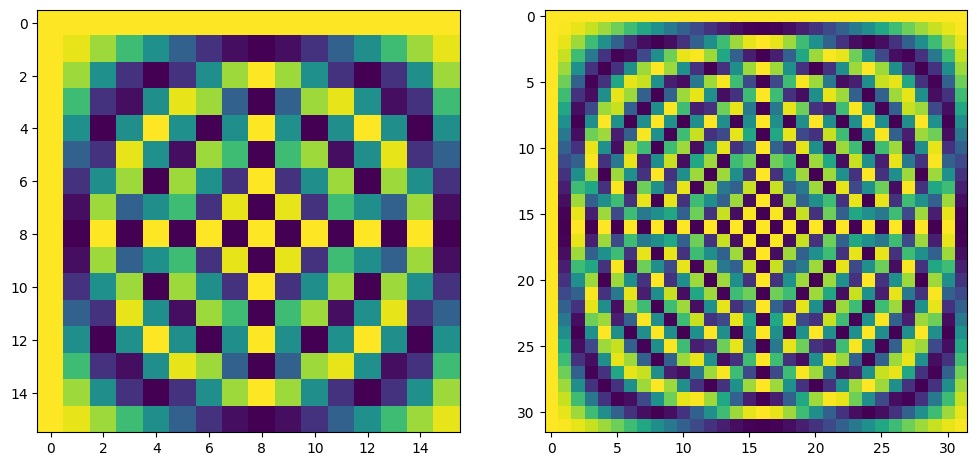

In [56]:
def dft_matrix(size = 7):
    """
    Returns the Discrete Fourier Transformation Matrix of order `n`.
    """
    # your code here
    n = np.arange(size)
    k = n.reshape((size, 1))
    matrix = np.exp(-2j * np.pi * k * n / size)
    return matrix

plt.subplot(121)
plt.imshow(dft_matrix(16).real)
plt.subplot(122)
plt.imshow(dft_matrix(32).real)
plt.show()

# Exercise 4 - Spectrogram - 3 Points

A [spectrogram](https://en.wikipedia.org/wiki/Spectrogram) visualises the intensities of the different frequencies over time. On the x-axis is the time and on the y-axis are the frequencies.
Your task is to build the spectrogram of the given audio clip. If you have not finished exercise 4, you can use a library for the fourier transformation.

In [57]:
def load_wav(url):
    f = requests.get(url, verify=certifi.where())
    buffer = BytesIO(f.content)
    sample_rate, audio = wavfile.read(buffer)
    if len(audio.shape) == 2:
        # only select one channel
        audio = audio[:, 0]
    return sample_rate, audio / audio.max()

In [58]:
dolphines_url = "http://www.pmel.noaa.gov/acoustics/whales/sounds/whalewav/akhumphi1x.wav"
# some dolphin sounds
sample_rate, audio = load_wav(dolphines_url)

In [59]:
print(audio.shape)

(377006,)


In [60]:
# listen to the audio, does not work when viewing in PyCharm
adt.Audio(data=audio, rate=sample_rate)

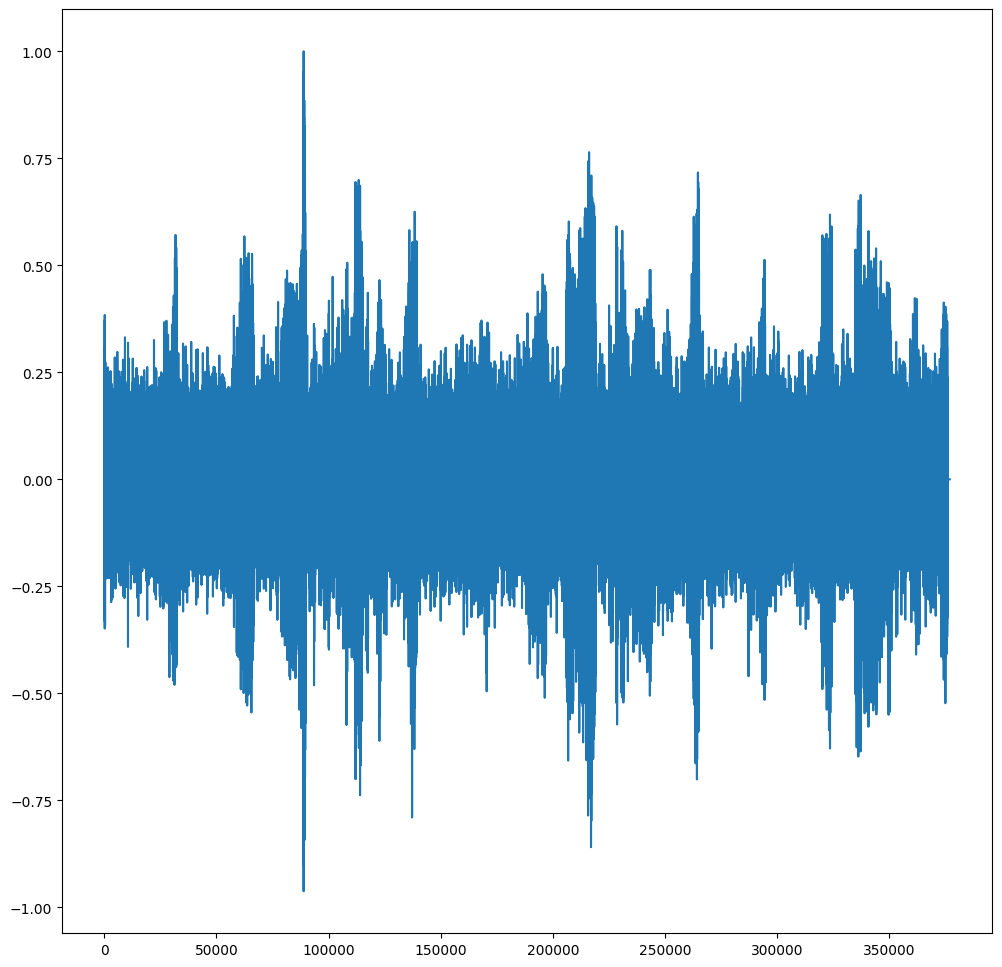

In [61]:
# plot the values.
plt.plot(audio)
plt.show()

In [62]:
def spectrogram(audio, window_size=500):
    """
    Builds the spectrogram of the audio clip. Split the audio clip into buckets of `window_size` and 
    use the discrete fourier transformation to get the intensity of the frequencies.
    The entry at position (i, j) of the matrix is the intensity of the i-th frequencies in the j-th bucket.
    """
    # your code here
    number_of_chunks = len(audio) // window_size
    chunks = np.array_split(audio, number_of_chunks)
    results = np.zeros((window_size // 2, number_of_chunks), dtype=complex)
    for j, chunk in enumerate(chunks):
        dft_result = np.fft.fft(chunk)
        results[:,j] = dft_result[:window_size // 2]
    return results
       
    #return np.zeros((window_size // 2, len(audio) // window_size))

In [104]:
specgram = np.abs(spectrogram(audio, window_size=500))

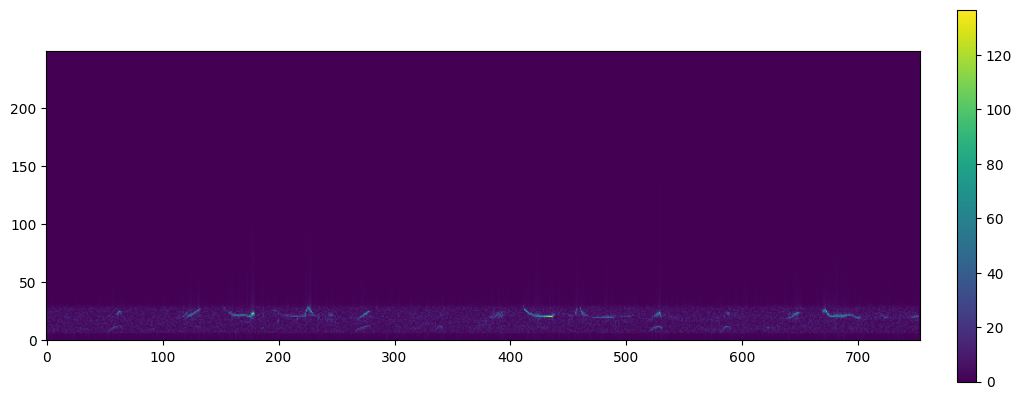

In [105]:
im = plt.imshow(specgram, origin='lower')
plt.colorbar(im, fraction=0.02, pad=0.04)
plt.show()

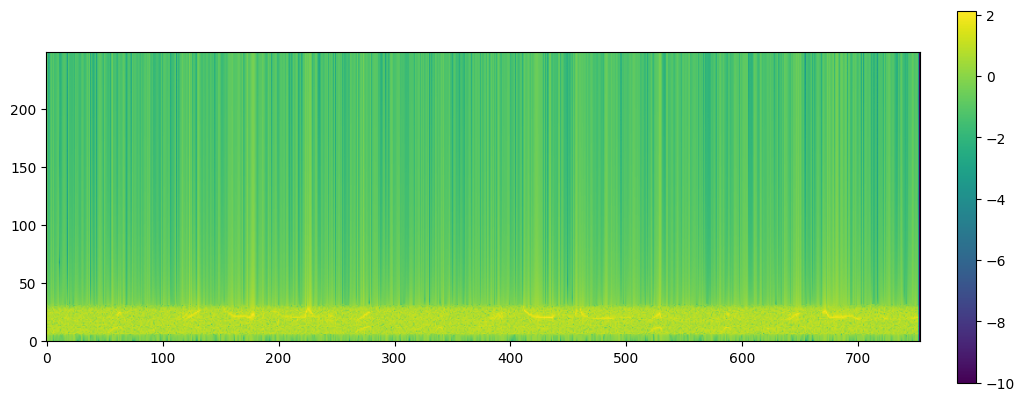

In [106]:
# plot it logarithmically
log_specgram = np.log10(specgram + 1e-10)
im = plt.imshow(log_specgram, origin='lower')
# your code here
plt.colorbar(im, fraction=0.02, pad=0.04)
plt.show()